## Final Project Submission

Please fill out:

* Students name:
  
  1. Daphine Lucas
  2. Joseph Karumba
  3. Wachuka Kinyanjui
  4. Winny Chemusian
  5. Wambui Githinji
  6. Allan Mataen
     
  
* Student pace: Part time
  
  
* Scheduled project review date/time:
  
  
* Instructor name:
  1. Noah Kandie
  2. William Okomba
     
 

# INTRODUCTION

In this project, we explore the King County House Sales dataset, which contains information on houses sold in King County, USA. Our objective is to provide accurate insights to assist homeowners and real estate agencies in crucial decisions regarding property valuation and market trends. By leveraging linear regression modeling, we aim to develop a powerful tool that predicts potential property value increases based on key factors such as bedrooms, floors, living space, condition, and location. This tool will offer valuable guidance for pricing strategies, understanding market dynamics, and making well-informed property-related decisions.

# BUSINESS UNDERSTANDING

The real estate market in King County, USA, is dynamic and competitive, making it essential for homeowners and real estate agencies to stay informed about property values and market trends. By analyzing the King County House Sales dataset, we aim to provide valuable insights that empower homeowners and agencies to make informed decisions.

For real estate agencies, having access to a predictive model that factors in key features such as bedrooms, year built, living space, and location can significantly enhance their market analysis capabilities. This tool can assist agencies in accurately valuing properties, identifying market trends, and developing effective pricing strategies to attract buyers or renters.

Overall, our project aims to bridge the gap between data analysis and real-world decision-making in the real estate industry, providing actionable insights that drive success for homeowners and agencies alike.

1. Data loading
2. Data inspection and understanding
3. Data cleaning
4. Exploratory data analysis
5. Statistical Analysis
6. Modelling
7. Regression Results
8. Conclusion
9. Recommendations

# DATA UNDERSTANDING

In the data understanding phase, we will explore and analyze the dataset to gain a better understanding of its structure, contents, and potential insights it can offer.

In [1]:
# Importing standard packages and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## LOADING DATA

In [2]:
# Loading the csv file

f1 = r"kc_house_data.csv"
df = pd.read_csv(f1)

## DATA INSPECTION AND UNDERSTANDING

In [3]:
# Previewing a sample
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Checking the shape of our dataframe
df.shape

(21597, 21)

In [5]:
# Checking the info and uniformity of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* We have three different data types in our dataset - float64, int64, object.

In [6]:
# Checking data numerical summaries
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## DATA CLEANING

In [7]:
# Making a copy of the merged data set to retain an original copy.
# df_clean is our clean dataset

df_clean = df.copy()

#### Checking for completeness of our data

In [8]:
# Checking the proportion of our missing data
df_clean.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

* Let's check the value counts of the columns with missing values.

In [9]:
# Calculate value counts for each column
value_counts_col1 = df['yr_renovated'].value_counts()
value_counts_col2 = df['view'].value_counts()
value_counts_col3 = df['waterfront'].value_counts()

print("Value counts for yr_renovated:")
print(value_counts_col1)

print("\nValue counts for view:")
print(value_counts_col2)

print("\nValue counts for waterfront:")
print(value_counts_col3)

Value counts for yr_renovated:
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

Value counts for view:
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Value counts for waterfront:
NO     19075
YES      146
Name: waterfront, dtype: int64


* A larger percentage of the data has the values 0.0. We can drop this column as replacing missing values with the mean or the most frequent value will lead to inaccuracy of our data.
* Most of the houses do not have a view. The proportion of missing data is very small and hence we can replace the missing values with NONE.
* Majority of the houses do not have a waterfront. We can replace the missing values here with NO as it is the most frequent.

#### Dropping irrelevant columns

In [10]:
# dropping irrelevant columns

df_clean = df_clean.drop(columns=["lat", "long", "zipcode", "yr_renovated"])

#### Handling missing values

In [11]:
# Filling missing values in waterfront column with 'NO'

df_clean['waterfront'].fillna('NO', inplace=True)

In [12]:
# Filling missing valuees in view column with 'NONE'

df_clean['view'].fillna('NONE', inplace=True)

In [13]:
# Check if missing values have been handled

df_clean.isnull().mean()

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

* We now have no missing values.

In [14]:
#  Checking for duplicates

duplicates = df_clean[df_clean.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found.")
    print(duplicates)


No duplicates found.


* Let us check for duplicates in th ID column as it is our unique identifier.

In [15]:
# Checking for duplicates using the 'id' column

df_clean[df_clean.duplicated(subset=["id"])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,Average,8 Good,1290,290.0,1939,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,Average,11 Excellent,2690,1600.0,1997,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,Average,6 Low Average,960,280.0,1922,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,Average,6 Low Average,1000,0.0,1943,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,Very Good,7 Average,1100,1080.0,1954,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,Average,9 Better,2910,0.0,2012,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,Average,7 Average,990,10.0,2004,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NO,NONE,Average,8 Good,2680,0.0,2013,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,Average,7 Average,1200,0.0,1933,1130,1598


* We will drop the duplicates as they can introduce inconsistencies to our data.

In [16]:
df_clean.drop_duplicates(subset=["id"], inplace=True)

In [17]:
# confirm duplicates have been dropped.

df_clean[df_clean.duplicated(subset=["id"])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15


#### Checking for placeholders

* Placeholders in data cleaning are values used to represent missing or unknown data in a dataset. They stand in for actual data that is unavailable or not recorded.
* Placeholders include - NaN, 
Nul , Non, " " , s
Special co such as;g., -1, 99 ble"
"Mi and others.plicable"

In [18]:
potential_placeholders = [" " , "-", "--", "?", "??" , "#","#####" , "-1" , "9999", "999" , "unknown", "missing", "na" , "n/a"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in potential_placeholders):
            count = (df_clean[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")


Column 'sqft_basement': Found 452 occurrences of potential placeholder '?'


In [19]:
# Step 1: Identify the placeholder values
placeholder = '?'

# Step 2: Replace the placeholder values with 0
df_clean['sqft_basement'] = df_clean['sqft_basement'].replace(placeholder, '0')

# Step 3: Convert the data type of the column to floats
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

# Check if the conversion was successful
print("Data type after conversion:", df_clean['sqft_basement'].dtype)


Data type after conversion: float64


In [20]:
# Confirm removal of placeholders

potential_placeholders = [" " , "-", "--", "?", "??" , "#","#####" , "-1" , "9999", "999" , "unknown", "missing", "na" , "n/a"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in potential_placeholders):
            count = (df_clean[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  sqft_living15  21420 non-null  int64  
 16  sqft_lot15     21420 non-null  int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 2

* We have inconsistencies with our data types - date, waterfront, view , condition and grade are categorical.

#### Handling non-numerical data

* We are checking for value counts to decide how to best handle our non numerical data.

In [22]:
# Calculate value counts for each column
value_counts_col4 = df['condition'].value_counts()
value_counts_col5 = df['grade'].value_counts()


print("Value counts for condition:")
print(value_counts_col4)

print("\nValue counts for grade:")
print(value_counts_col5)

Value counts for condition:
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Value counts for grade:
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


* We used the LabelEncoding technique as our values ar hierarchical.

In [23]:
from sklearn.preprocessing import LabelEncoder

# label encoder object
label_encoder = LabelEncoder()

# Encode the 'condition' column
df_clean['condition_encoded'] = label_encoder.fit_transform(df_clean['condition'])

# Encode the 'grade' column
df_clean['grade_encoded'] = label_encoder.fit_transform(df_clean['grade'])

# Encode the 'season' column
df_clean['view_encoded'] = label_encoder.fit_transform(df_clean['view'])


* We handled our waterfront column by changing the categorical values to binary.

In [24]:
# Define the mapping from original values to binary values
mapping = {'NO': 0, 'YES': 1}

# Apply the mapping and replace the values in the 'waterfront' column
df_clean['waterfront'] = df_clean['waterfront'].map(mapping)


#### Feature engineering-Time series feature

* We are using the `date` feature to create a new feature called `season`, which represents whether the home was sold in Spring, Summer, Fall, or Winter.
* This will help with understanding seasonal trends in housing sales.

In [25]:
# Converting 'date' to datetime object 
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Extract month from 'date'
df_clean['month'] = df_clean['date'].dt.month

# Map month to season
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

df_clean['season'] = df_clean['month'].map(season_mapping)

# Dropping 'month' column because we do not need it anymore
df_clean.drop(['month', 'date'], axis=1, inplace=True)

* We need to change our season column which is categorical to numerical.

In [26]:
##one hot encoding for season

df2 = pd.get_dummies(df_clean, columns=['season'], dtype=int)
df2 = df2.drop(['season_Spring'], axis=1)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21420 non-null  int64  
 1   price              21420 non-null  float64
 2   bedrooms           21420 non-null  int64  
 3   bathrooms          21420 non-null  float64
 4   sqft_living        21420 non-null  int64  
 5   sqft_lot           21420 non-null  int64  
 6   floors             21420 non-null  float64
 7   waterfront         21420 non-null  int64  
 8   view               21420 non-null  object 
 9   condition          21420 non-null  object 
 10  grade              21420 non-null  object 
 11  sqft_above         21420 non-null  int64  
 12  sqft_basement      21420 non-null  float64
 13  yr_built           21420 non-null  int64  
 14  sqft_living15      21420 non-null  int64  
 15  sqft_lot15         21420 non-null  int64  
 16  condition_encoded  214

In [28]:
# Creating a new dataframe with numerical dtypes only

# columns to exclude
columns_to_exclude = ['view', 'condition', 'grade' , 'id']  

# Creating a new dataset df3 excluding the specified columns
df3 = df2.drop(columns=columns_to_exclude)

# Display the first few rows of the new dataset df1
df3.head()

# df3 is our dataframe with numerical dtypes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_encoded,grade_encoded,view_encoded,season_Fall,season_Summer,season_Winter
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,1340,5650,0,8,4,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,1690,7639,0,8,4,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,770,0.0,1933,2720,8062,0,7,4,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,1360,5000,4,8,4,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,1800,7503,0,9,4,0,0,1


#### Handling outliers

In [29]:
numeric_columns1 = df3[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15']]

# Loop through each numeric column
for column in numeric_columns1:
    # Calculate IQR
    q1 = df3[column].quantile(0.25)
    q3 = df3[column].quantile(0.75)
    iqr = q3 - q1

    # Calculate outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count outliers
    num_outliers = ((df3[column] < lower_bound) | (df3[column] > upper_bound)).sum()

    # Print the result
    print(f"Column: {column}, Number of outliers: {num_outliers}")

Column: bedrooms, Number of outliers: 518
Column: bathrooms, Number of outliers: 558
Column: sqft_living, Number of outliers: 568
Column: sqft_lot, Number of outliers: 2406
Column: floors, Number of outliers: 0
Column: sqft_above, Number of outliers: 600
Column: sqft_basement, Number of outliers: 556
Column: yr_built, Number of outliers: 0
Column: sqft_living15, Number of outliers: 503
Column: sqft_lot15, Number of outliers: 2174


In [30]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(df3, column):
    q1 = df3[column].quantile(0.25)
    q3 = df3[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df3[column] = df3[column].clip(lower=lower_bound, upper=upper_bound)

# Columns with outliers
outlier_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15']

# Apply the handle_outliers_iqr function to each column
for col in outlier_columns:
    handle_outliers_iqr(df3, col)


* Checking if our outliers have been handled.

In [31]:
numeric_columns1 = df3[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15']]

# Loop through each numeric column
for column in numeric_columns1:
    # Calculate IQR
    q1 = df3[column].quantile(0.25)
    q3 = df3[column].quantile(0.75)
    iqr = q3 - q1

    # Calculate outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count outliers
    num_outliers = ((df3[column] < lower_bound) | (df3[column] > upper_bound)).sum()

    # Print the result
    print(f"Column: {column}, Number of outliers: {num_outliers}")

Column: bedrooms, Number of outliers: 0
Column: bathrooms, Number of outliers: 0
Column: sqft_living, Number of outliers: 0
Column: sqft_lot, Number of outliers: 0
Column: floors, Number of outliers: 0
Column: sqft_above, Number of outliers: 0
Column: sqft_basement, Number of outliers: 0
Column: yr_built, Number of outliers: 0
Column: sqft_living15, Number of outliers: 0
Column: sqft_lot15, Number of outliers: 0


## EXPLORATORY DATA ANALYSIS

#### Correlation

In [32]:
# Calculate correlation matrix
correlation_matrix = df3.corr()

# Extract correlation coefficients with 'price'
price_correlations = correlation_matrix['price']

# Sort correlation coefficients in descending order
price_correlations_sorted = price_correlations.sort_values(ascending=False)

# Print correlation coefficients
print("Correlation Coefficients with Price (Descending Order):")
print(price_correlations_sorted)


Correlation Coefficients with Price (Descending Order):
price                1.000000
sqft_living          0.646389
sqft_living15        0.568750
sqft_above           0.559166
bathrooms            0.481395
bedrooms             0.318878
sqft_basement        0.285521
waterfront           0.264898
floors               0.256286
sqft_lot             0.196494
sqft_lot15           0.191368
yr_built             0.052906
condition_encoded    0.021223
season_Summer        0.010247
season_Fall         -0.013602
season_Winter       -0.025421
view_encoded        -0.304492
grade_encoded       -0.367072
Name: price, dtype: float64


* These correlation coefficients indicate the strength and direction of the relationship between each feature and the house price:
* Strong Positive Correlation (values close to 1): Features like 'sqft_living', 'sqft_above', 'sqft_living15', and 'bathrooms' have a strong positive correlation with the house price. This suggests that as these feature values increase, the house price tends to increase as well.
* Moderate Positive Correlation (values between 0.3 and 0.7): Features like 'sqft_basement', 'bedrooms', 'waterfront', and 'floors' show a moderate positive correlation with the house price. They influence the price but not as strongly as the features with higher correlation coefficients.
* Weak Positive Correlation (values between 0 and 0.3): Features such as 'sqft_lot', 'sqft_lot15', 'yr_built', and 'condition_encoded' exhibit a weak positive correlation with the house price. Their impact on the price is minimal compared to other features.
* Negative Correlation (values less than 0): Features like 'view_encoded' and 'grade_encoded' have negative correlations with the house price, indicating that as these feature values decrease, the house price tends to increase. However, it's important to note that these correlations are relatively weak compared to the positive correlations.
* Additionally, the 'season' features ('season_Summer', 'season_Fall', 'season_Winter') show very weak correlations with the house price, suggesting they have little influence on pricing.

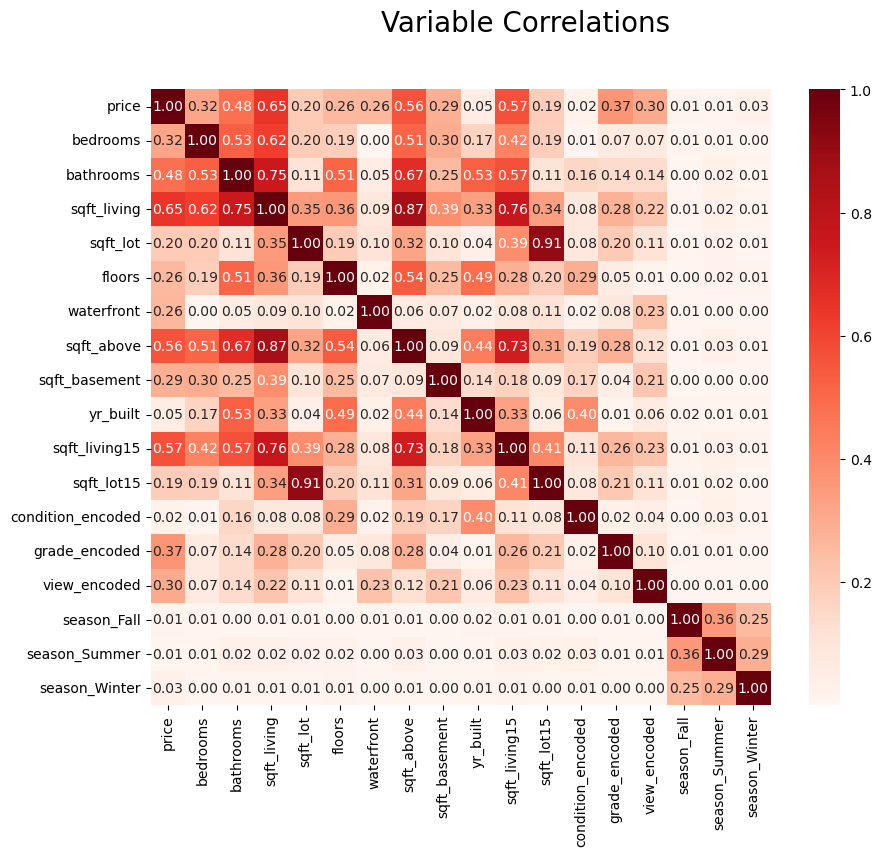

In [33]:
corr = df3.corr().abs()
fig, ax=plt.subplots(figsize=(10,8))
fig.suptitle('Variable Correlations', fontsize=20, y=.98, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True , fmt=".2f")

## MODELING

### Baseline model

In [34]:
#### Simple Linear Regression

* We are building a simple linear regression model between 'price' and 'sqft_living' to understand the relationship better.

In [35]:
from statsmodels.formula.api import ols


# Simple model for sqft_living
# Formula y ~ x
sqft_living_formula = 'price ~ sqft_living'
sqft_living_model = ols(sqft_living_formula, df3).fit()

# Finding the predicted values and the residuals for plotting
predicted_values_sqft_living = sqft_living_model.fittedvalues

sqft_living_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:34:18   Log-Likelihood:            -2.9911e+05
No. Observations:               21420   AIC:                         5.982e+05
Df Residuals:                   21418   BIC:                         5.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.349e+04   5087.721     -8.548      0.000   -5.35e+04   -3.35e+04
sqft_living   283.4564      2.286    123.981      0.000     278.975     287.938
==============================================================================
Omnibus:                    20682.954   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2707800.341
Skew:                           4.343   Prob(JB):                         0.00
Kurtosis:                      57.392   Cond. No.                     5.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variable(s). In this case, R-squared is 0.418, indicating that approximately 41.8% of the variance in 'price' is explained by 'sqft_living'.
* Our model is statistically significant because our F-statistic p-value is less than 0.05.
* Coefficients:

      * Intercept: The intercept term represents the value of the dependent variable when all independent variables are set to zero. In this case, the intercept is -4.349e+04.
      * sqft_living: The coefficient for 'sqft_living' is 283.4564, indicating that for each unit increase in square footage of living space, the 'price' is expected to increase by $283.4564, holding all other variables constant.
   
Null Hypothesis:

The null hypothesis for each coefficient is that it is equal to zero.
In this context, for 'sqft_living', the null hypothesis is that the coefficient of 'sqft_living' is equal to zero, implying that there is no linear relationship between square footage of living space and price.
Since the p-value for 'sqft_living' is close to zero, we reject the null hypothesis and conclude that there is a statistically significant linear relationship between 'sqft_living' and 'price'.


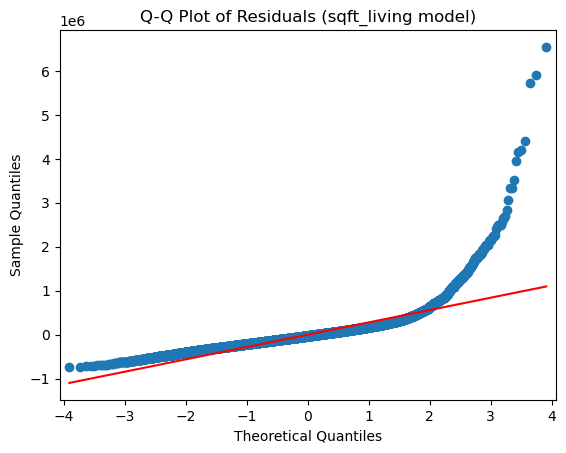

In [36]:
# Assuming 'sqft_living_model' is the fitted regression model
# This code computes and stores the residuals of the 'sqft_living_model', which can be used for further analysis, such as
# assessing the model's goodness of fit, checking for heteroscedasticity or autocorrelation, or identifying outliers.

residuals_sqft_living = sqft_living_model.resid

# Create a Q-Q plot of the residuals
sm.qqplot(residuals_sqft_living, line='s')
plt.title('Q-Q Plot of Residuals (sqft_living model)')
plt.show()

* Homoscedasticity - it means that the spread of the residuals should be uniform across the range of predicted values.
* As we can see, this model violates the homoscedasticity and normality assumptions for linear regression.

In [37]:
# Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs 
# and re-check the assumptions.

df3['price'] = np.log(df3['price'])
df3['sqft_living'] = np.log(df3['sqft_living'])

* Q-Q plots are useful for visually assessing the distributional characteristics of variables and identifying departures from normality.

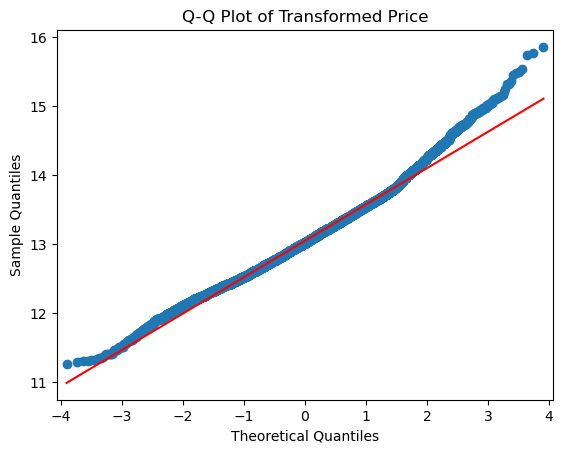

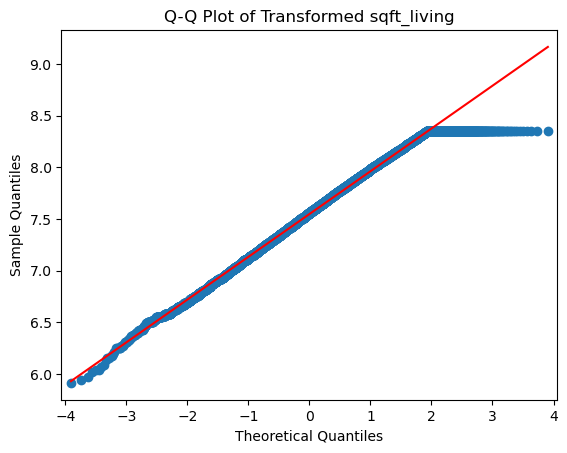

In [38]:
# Create a Q-Q plot for the 'price' variable
sm.qqplot(df3['price'], line='s')
plt.title('Q-Q Plot of Transformed Price')
plt.show()

# Create a Q-Q plot for the 'sqft_living' variable
sm.qqplot(df3['sqft_living'], line='s')
plt.title('Q-Q Plot of Transformed sqft_living')
plt.show()

* The points on the plot closely follow the diagonal line (line='s' indicates a standardized line), it suggests that the 'price' variable is approximately normally distributed.
* Deviations from the diagonal line suggest departures from normality, such as skewness or heavy tails.

##### Now we will create a Simple linear regression for the column price and bathrooms.

In [39]:
from statsmodels.formula.api import ols

# Simple model for bathrooms
# Formula y ~ x
bathrooms_formula = 'price ~ bathrooms'
bathrooms_model = ols(bathrooms_formula, df3).fit()

# Finding the predicted values and the residuals for plotting
predicted_values_bathrooms = bathrooms_model.fittedvalues

bathrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     8756.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:34:19   Log-Likelihood:                -12990.
No. Observations:               21420   AIC:                         2.598e+04
Df Residuals:                   21418   BIC:                         2.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2218      0.009   1307.916      0.000      12.204      12.240
bathrooms      0.3935      0.004     93.574      0.000       0.385       0.402
==============================================================================
Omnibus:                      299.524   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.033
Skew:                           0.287   Prob(JB):                     1.06e-68
Kurtosis:                       3.149   Cond. No.                         8.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared is 0.290, indicating that approximately 29.0% of the variance in 'price' is explained by 'bathrooms'.
* The associated probability (Prob (F-statistic)) is close to 0, suggesting that the regression model is statistically significant.
* Coefficients:

       * Intercept: The intercept term represents the value of the dependent variable when all independent variables are set to zero. In this case, the intercept is 12.2218.
       * Bathrooms: The coefficient for 'bathrooms' is 0.3779, indicating that for each additional bathroom, the 'price' is expected to increase by 0.3935 units, holding all other variables constant.

Null Hypothesis:

The null hypothesis for each coefficient is that it is equal to zero.
In this context, for 'bathrooms', the null hypothesis is that the coefficient of 'bathrooms' is equal to zero, implying that there is no linear relationship between the number of bathrooms and price.
Since the p-value for 'bathrooms' is close to zero, we reject the null hypothesis and conclude that there is a statistically significant linear relationship between the number of bathrooms and price.

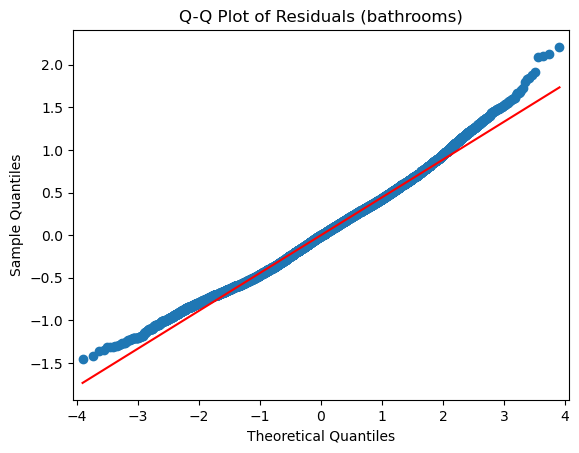

In [40]:
# Assuming 'sqft_living_model' is the fitted regression model

residuals_bathrooms = bathrooms_model.resid

# Create a Q-Q plot of the residuals
sm.qqplot(residuals_bathrooms, line='s')
plt.title('Q-Q Plot of Residuals (bathrooms)')
plt.show()

* This model does not violate the homoscedasticity and normality assumptions for linear regression.

### Multiple linear regression 

In [41]:
# Independent variables
X = df3.drop("price" ,axis=1) 
            

# Dependent variable
y = df3["price"]

In [42]:
#creating the model/#OrdinaryLeastSquares
import statsmodels.api as sm

# # Add a constant to the independent variables
X_with_const = sm.add_constant(X)


# Fit the OLS model
model = sm.OLS(y, X_with_const)
result = model.fit()

# Print the summary of the regression results
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1838.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:34:19   Log-Likelihood:                -7020.1
No. Observations:               21420   AIC:                         1.408e+04
Df Residuals:                   21402   BIC:                         1.422e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                20.0988      0.24

* The warning on standard errors suggests that there might be issues with the model's assumptions or with the data itself, which could affect the accuracy of the standard errors and subsequently the validity of the inference drawn from the model.
* We will check for multicollinearity and adress it accordingly

* The R-squared value of 0.594 indicates that approximately 59.4% of the variance in 'price' is explained by the independent variables included in the model.
* Significance of Coefficients:
Most of the coefficients have p-values less than 0.05, indicating that they are statistically significant at the 5% significance level)

##### Violation of assumptions

* Linearity

In [43]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Assuming X is your independent variable matrix and y is your dependent variable vector
# Fit your regression model
model = sm.OLS(y, X).fit()

# Perform the Rainbow test
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)


Rainbow Test Statistic: 0.9888132810806641
Rainbow Test p-value: 0.7196740919617328


* Rainbow Test Statistic: The test statistic measures the deviation from linearity in the regression model. A value close to 1 suggests that the model's fit to the data is linear.
* 
Rainbow Test p-value: This p-value assesses the significance of the test statistic. A p-value greater than the significance level (commonly 0.05) indicates that there is no significant departure from linearity in the model. In this case, the p-value being high (71973) suggests that there is no evidence to reject the assumption of linearity in the regression modes.

#### Independence

* The Durbin-Watson statistic is a measure used to detect the presence of autocorrelation in the residuals of a regression model.
* Autocorrelation occurs when the residuals of the model exhibit correlation with each other, indicating that the assumption of independence of errors is violated.
* Our Durbin-Watson value is 1.983 indicating no autocorrelation meaning that the errors are independent of each other. The assumption of independence of errors is satisfied.

In [44]:
# Define the coefficients and predictions
coefficients = result.params
y_pred = result.predict()

# Calculate R-squared
r_squared = result.rsquared

# Calculate Mean Squared Error (MSE)
mse = result.mse_resid

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print("R-squared (R2):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R2): 0.5935141246373039
Mean Squared Error (MSE): 0.1128650341562047
Root Mean Squared Error (RMSE): 0.3359539167150827


* R-squared of 0.593 suggests that approximately 59% of the variance in the dependent variable is explained by the independent variables in the model.
* MSE and RMSE of 0.1128 and 0.336, respectively, indicate the average squared difference and average magnitude of errors between actual and predicted values. Lower values of MSE and RMSE are generally considered better. In this case, RMSE is approximately 0.336, indicating the average error in predicting the dependent variable is around 0.336 units.
* Overall, an R-squared of 0.593 and low values of MSE and RMSE suggest that the model has a decent level of predictive power and performs reasonably well in explaining the variability in the dependent variable.

#### Checking distribution of our target y

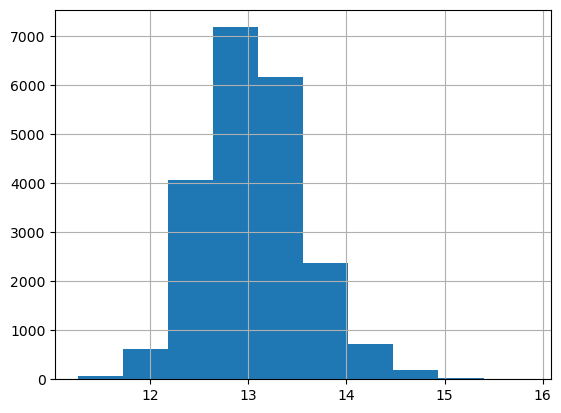

In [45]:
#checking distribution of our target y
y.hist();

* Our data is normally distributed.

In [46]:
#checking std deviation of the original predictors
np.std(X)

bedrooms                0.852045
bathrooms               0.721022
sqft_living             0.414009
sqft_lot             5052.019785
floors                  0.540068
waterfront              0.082278
sqft_above            765.141767
sqft_basement         413.252573
yr_built               29.386455
sqft_living15         650.717716
sqft_lot15           4368.277039
condition_encoded       1.266860
grade_encoded           2.309329
view_encoded            0.924353
season_Fall             0.424212
season_Summer           0.456171
season_Winter           0.375329
dtype: float64

In [47]:
# standand scaling(subtract the mean of the variable/the std deviation of the variable)

#including all the columns
X_scaled = (X-np.mean(X))/np.std(X)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [48]:
#modeling
X_pred = sm.add_constant(X_scaled)
#building the model
model2 =  sm.OLS(y , X_pred).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1838.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:34:20   Log-Likelihood:                -7020.1
No. Observations:               21420   AIC:                         1.408e+04
Df Residuals:                   21402   BIC:                         1.422e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0489      0.002   5684.659      0.000      13.044      13.053
bedrooms             -0.0599      0.003    -19.378      0.000      -0.066      -0.054
bathrooms             0.0793      0.004     18.914      0.000       0.071       0.088
sqft_living           0.0820      0.009      8.693      0.000       0.064       0.101
sqft_lot             -0.0281      0.006     -4.977      0.000      -0.039      -0.017
floors                0.0613      0.003     17.759      0.000       0.055       0.068
waterfront            0.0422      0.002     17.733      0.000       0.038       0.047
sqft_above            0.1566      0.009     17.437      0.000       0.139       0.174
sqft_basement         0.0951      0.005     18.711      0.000       0.085       0.105
yr_built             -0.1375      0.003    -43.846      0.000      -0.144      -0.131
sqft_living15         0.1479      0.004     38.685      0.000       0.140       0.155
sqft_lot15           -0.0305      0.006     -5.353      0.000      -0.042      -0.019
condition_encoded     0.0226      0.003      8.809      0.000       0.018       0.028
grade_encoded        -0.0268      0.003    -10.293      0.000      -0.032      -0.022
view_encoded         -0.0371      0.002    -14.976      0.000      -0.042      -0.032
season_Fall          -0.0215      0.003     -8.001      0.000      -0.027      -0.016
season_Summer        -0.0171      0.003     -6.277      0.000      -0.022      -0.012
season_Winter        -0.0210      0.003     -8.003      0.000      -0.026      -0.016
==============================================================================
Omnibus:                       28.276   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.066
Skew:                          -0.051   Prob(JB):                     1.79e-07
Kurtosis:                       3.157   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  In this case, R-squared is 0.594, suggesting that approximately 59.4% of the variance in house prices is explained by the independent variables.
*  the F-statistic is 1838 with a very low p-value (0.00), indicating that the regression model is statistically significant.
* The coefficients provide insights into the relationship between each predictor variable and the house prices.variables with positive coefficients (e.g., bathrooms, waterfront) are associated with higher house prices, while variables with negative coefficients (e.g., bedrooms, yr_built) are associated with lower house prices.

## Multicollinearity

In [49]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df3 is your DataFrame containing the data
col = df3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'condition_encoded', 'grade_encoded',
           'view_encoded']]

# Convert the DataFrame column values into a NumPy array
X = col.values

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = col.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif



,Features,VIF
0,bedrooms,30.027609
1,bathrooms,26.556517
2,sqft_living,3884.198855
3,sqft_lot,24.035969
4,floors,19.480771
5,waterfront,1.078387
6,sqft_above,77.452221
7,sqft_basement,6.223543
8,yr_built,2898.443416
9,sqft_living15,28.209509


Variance Inflation Factor measures how much the variance of an estimated regression coefficient is increased due to multicollinearity in the model.

A VIF of 1 indicates no multicollinearity.
Typically, a VIF greater than 5 or 10 indicates multicollinearity issues.
Extremely high VIF values, such as those sabove00), suggest severe multicollinearcase:

The VIF values for "sqft_living," "sqft_lot," "sqft_above," "yr_built," "sqft_living15," and "sqft_lot1onally high, indicating strong multicollinearity among these variables.
This suggests that these variables are highly correlated with other predictors in the model, which can lead to unstable coefficient estimates and inflated standard 
We will sary to the address multicollineators  the Lasso tion or regula technique.
Given that our data set is high dimensional, Lasso would be the best technique for regularization. ization.

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assuming X contains your independent variables and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Lasso regression model
lasso_model = Lasso(alpha=0.1)  

# Fit the model to the training data
lasso_model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1581670236737812


* The Mean Squared Error (MSE) is a measure of the average squared difference between the actual values (ground truth) and the predicted values generated by a model. In this case, the MSE value of approximately 0.158 indicates that, on average, the squared difference between the actual house prices and the predicted house prices by the Lasso regression model is around 0.158.
* A lower MSE value suggests that the model's predictions are closer to the actual values, indicating better performance.

In [51]:
import statsmodels.api as sm

# Define your independent variables (features)
X = df3[['sqft_living', 'sqft_living15' , 'sqft_above', 'bathrooms', 'bedrooms', 'view_encoded' , 'grade_encoded']]

# Add a constant to the independent variables matrix (required for OLS)
X = sm.add_constant(X)

# Define your dependent variable (target)
y = df3['price']

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3192.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:34:21   Log-Likelihood:                -9006.9
No. Observations:               21420   AIC:                         1.803e+04
Df Residuals:                   21412   BIC:                         1.809e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.7930      0.094     93.856

* R-squared is 0.511, indicating that approximately 51.1% of the variance in house prices is explained by the independent variables.
* the F-statistic is 3192 with a p-value of 0.00, indicating that the regression model is statistically significant.
* The condition number is large (1.06e+05), which might indicate strong multicollinearity or other numerical problems. It's essential to further investigate multicollinearity issues if present.
* The regression model appears to be statistically significant, with several predictor variables showing significant effects on house prices

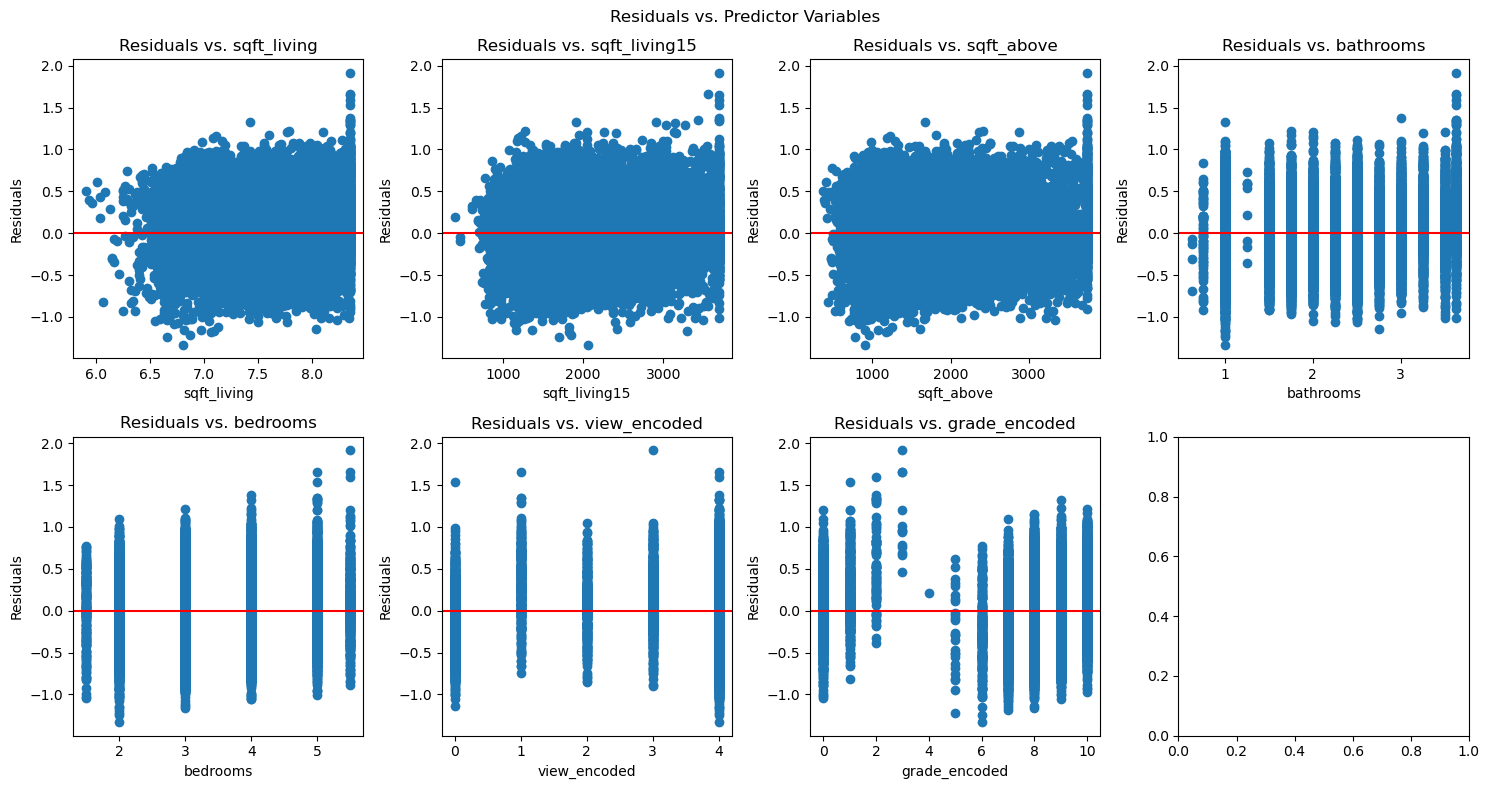

In [52]:
# Residuals vs. Predictor Variables (for linearity and independence)
# Assuming 'X' contains predictor variables used in the model

X = df3[['sqft_living', 'sqft_living15' , 'sqft_above', 'bathrooms', 'bedrooms', 'view_encoded' , 'grade_encoded']]

import matplotlib.pyplot as plt
import seaborn as sns


# Get the residuals
residuals = results.resid

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
fig.suptitle("Residuals vs. Predictor Variables")

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

for i, col in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X[col], residuals)
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_xlabel(col)
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals vs. {col}')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


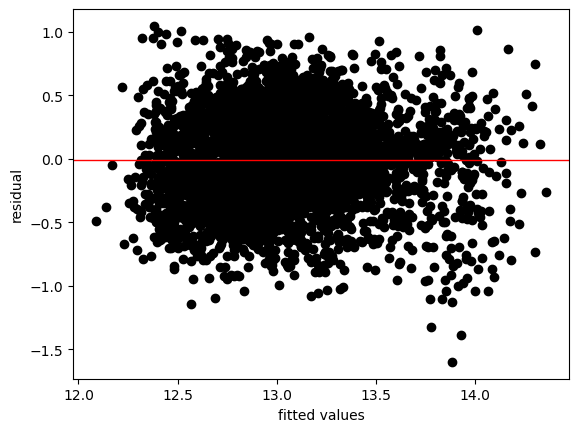

In [53]:
# Residual Plot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#
X= df3[['sqft_living', 'sqft_living15' , 'sqft_above', 'bathrooms', 'bedrooms', 'view_encoded' , 'grade_encoded']]
y= df3['price']
#
X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, admit_train)
# This is our prediction our model
y_predict = regressor.predict(X_test)
#
residuals = np.subtract(y_predict, admit_test)
# Plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### Feature selection

In [54]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=7)

In [55]:
ss = StandardScaler()
ss.fit(df3.drop('price', axis=1))

df3_scaled = ss.transform(df3.drop('price', axis=1))

In [56]:
select.fit(X=df3_scaled, y=df3['price'])

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [57]:
select.support_

array([ True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False, False])

In [58]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,condition_encoded,grade_encoded,view_encoded,season_Fall,season_Summer,season_Winter
0,12.309982,3.0,1.00,7.073270,5650.0,1.0,0,1180.0,0.0,1955,1340.0,5650.0,0,8,4,1,0,0
1,13.195614,3.0,2.25,7.851661,7242.0,2.0,0,2170.0,400.0,1951,1690.0,7639.0,0,8,4,0,0,1
2,12.100712,2.0,1.00,6.646391,10000.0,1.0,0,770.0,0.0,1933,2720.0,8062.0,0,7,4,0,0,1
3,13.311329,4.0,3.00,7.580700,5000.0,1.0,0,1050.0,910.0,1965,1360.0,5000.0,4,8,4,0,0,1
4,13.142166,3.0,2.00,7.426549,8080.0,1.0,0,1680.0,0.0,1987,1800.0,7503.0,0,9,4,0,0,1


In [59]:
select.ranking_

array([ 1,  1,  3,  2,  1,  4,  1,  1,  1,  1,  6,  8,  7,  5, 10, 11,  9])

In [60]:
# Polynomial Regression with 2 degrees
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
poly_reg_y_predicted = poly_reg_model.predict(X_test_scaled)

# Calculate RMSE
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse


0.34173130195385026

In [61]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Polynomial Regression with 3 degrees
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
poly_reg_y_predicted = poly_reg_model.predict(X_test_scaled)

# Calculate RMSE
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

# Evaluate the model performance with polynomial features
mse_poly = mean_squared_error(y_test, poly_reg_y_predicted)
rmse_poly = sqrt(mse_poly)
r2_poly = r2_score(y_test, poly_reg_y_predicted)

# Print model performance metrics with polynomial features
print("Model Performance with Polynomial Features:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2):", r2_poly)

Model Performance with Polynomial Features:
Mean Squared Error (MSE): 0.11071476815605068
Root Mean Squared Error (RMSE): 0.3327382877819303
R-squared (R2): 0.604236353410019


In [62]:
# Polynomial Regression with 4 degrees
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
poly_reg_y_predicted = poly_reg_model.predict(X_test_scaled)

# Calculate RMSE
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse


0.33365265018153306

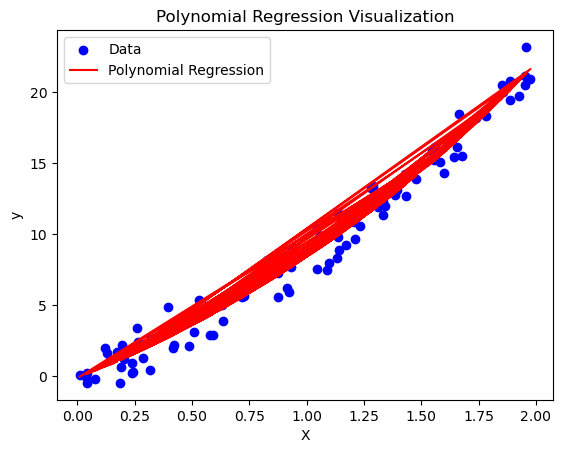

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X**2 + 5 * X + np.random.randn(100, 1)

# Fit polynomial regression model
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Visualize the data and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, poly_reg.predict(X_poly), color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Visualization')
plt.legend()
plt.show()


In [64]:
from sklearn.model_selection import cross_val_score

# X' contains the predictors and 'y' contains the target variable from your dataset
X = df3[['sqft_living', 'sqft_living15' , 'sqft_above', 'bathrooms', 'bedrooms', 'view_encoded' , 'grade_encoded']]
y = df3['price']

# Split the data into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
multiple_model_3 = LinearRegression()

# Fit the model on the training data
multiple_model_3.fit(X_train, y_train)

# Perform cross-validation and calculate both R^2 and mean squared error
cv_scores_r2 = cross_val_score(multiple_model_3, X_train, y_train, cv=5, scoring='r2')
cv_scores_mse = -cross_val_score(multiple_model_3, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation R^2 scores:", cv_scores_r2)
print("Mean R^2 score:", np.mean(cv_scores_r2))
print("Cross-validation MSE scores:", cv_scores_mse)
print("Mean MSE:", np.mean(cv_scores_mse))

# Evaluate the model on the test set
y_pred_test = multiple_model_3.predict(X_test)
test_r2 = multiple_model_3.score(X_test, y_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test R^2 score:", test_r2)
print("Test MSE:", test_mse)

Cross-validation R^2 scores: [0.49837495 0.51179891 0.52607659 0.49855351 0.5168576 ]
Mean R^2 score: 0.5103323136219119
Cross-validation MSE scores: [0.14258149 0.13418398 0.12999174 0.13682081 0.13425705]
Mean MSE: 0.13556701332855092
Test R^2 score: 0.5097620447238456
Test MSE: 0.13677834522286214


### FINDINGS AND CONCLUSSIONS

##### Recommendations
* The shareholder should encourage homeowners to do renovations so as to improve the overall condition and raise the property's grade as this has a great impact on the value of a house.

* There is also high impact of square footage of living space on house prices and use this information to justify higher listing prices for properties with more extensive square footage.

* The number of bathrooms and bedrooms also have a positive correlation with the value of a house. Therefore, during renovation adding a bedroom would increase the value of the house! 

* For price prediction of the houses, we recommend use of Polynomial regression model as it gives a high R- squared value which means that we can get a better and more accurate price value.

* Comprehensive Value Drivers: Property value extends beyond the physical space, being significantly influenced by structural integrity, prime location, and year of construction market.

* Quality and Lot Size Connection: A property's condition directly correlates with its lot size, highlighting the importance of upkeep and modernization in enhancing market value.

* Premium on Waterfront Views: Properties boasting waterfront views command higher market prices, representing a lucrative investment for buyers and a unique selling proposition for owners.

* Optimal Bedrooms and Bathrooms Mix: The combination of bedrooms and bathrooms significantly impacts house pricing, guiding strategic property selection for buyers and effective marketing for sellers.

##### Conclusions 
The study into the dynamics of housing price determinants underscores the complexity and multifaceted nature of real estate markets. The study reveals that a deep and nuanced understanding of regional trends, economic indicators, and a plethora of other variables is essential for crafting accurate and reliable predictive models. The insights gained from this research highlight the importance of adopting comprehensive and sophisticated analytical frameworks that can accommodate the intricate interplay of factors affecting housing prices.

Moreover, the findings underscore the value of continuous refinement and expansion of data collection methodologies, emphasizing the need for high-quality, diverse datasets. Such datasets are crucial for developing models that are not only robust and predictive but also reflective of the real-world variability and diversity of housing markets across different regions.

This research, therefore, not only contributes to the academic discourse on housing price prediction but also provides practical insights for policymakers, urban planners, and investors. By fostering a deeper understanding of market dynamics and improving predictive methodologies, we can better navigate the complexities of the housing market, ultimately contributing to more sustainable and equitable urban development